<a href="https://colab.research.google.com/github/lwehausen/Simulation/blob/main/DynamicalSystems_and_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#To run R in Google Colab:
%load_ext rpy2.ipython

In [ ]:
%%R
library(tidyverse)
library(ggplot2)
library(dplyr)
install.packages("rlist", repos =  "http://cran.us.r-project.org")
library(rlist)

#1. Dynamical Systems Population Stability

For $r ∈ [0, 4]$, the logistic map of $[0, 1]$ into $[0, 1]$ is defined as $f(x) = rx(1 − x)$. Given a point $x_1 \in [0, 1]$ the sequence $\{x_n\}_{n=1}^{\inf}$ given by $x_{n+1} = f(x_n)$ is called the discrete dynamical system defined by $f$. Write a function that takes as parameters $x_1$, $r$, and $n$, generates the first $n$ terms of the discrete dynamical system above, and then plots them. The logistic map is a simple model for population growth subject to resource
constraints: if $x_n$ is the population size at year $n$, then $x_{n+1}$ is the size at year $n+ 1$. Type up your code, then see how the system evolves for different starting values $x_1$ and different values of $r$.

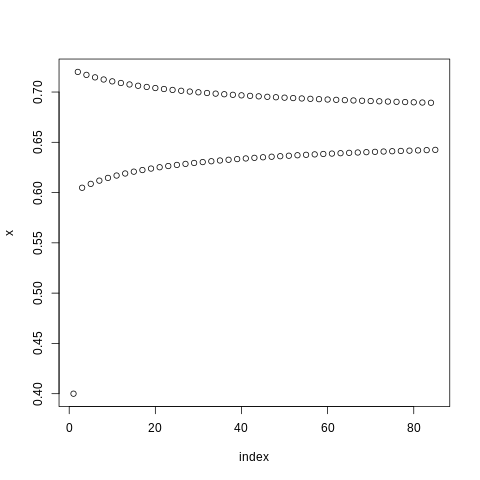

In [5]:
%%R
fun <- function(n,r,base) {
  if (n==1)
    return(c(base))
  else {
    previous = fun(n-1,r,base)
    prevv = previous[n-1]
    return(append(previous, r*prevv*(1-prevv)))
  }
}

myplot <- function(n,r,base) {
  index <- 1:n
  x <- fun(n,r,base)
  plot(index,x)
}
myplot(85,3,0.4)

#2. mtcars dataset plots

Using the mtcars dataset (it’s pre-loaded into R), construct a histogram of the the mile per gallon (mpg) variable first using R’s base graphics and then again with ggplot.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


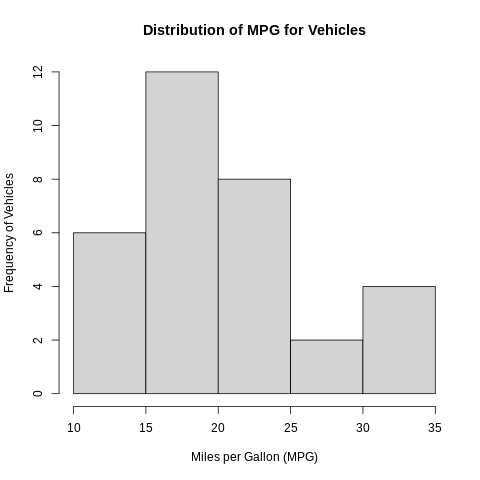

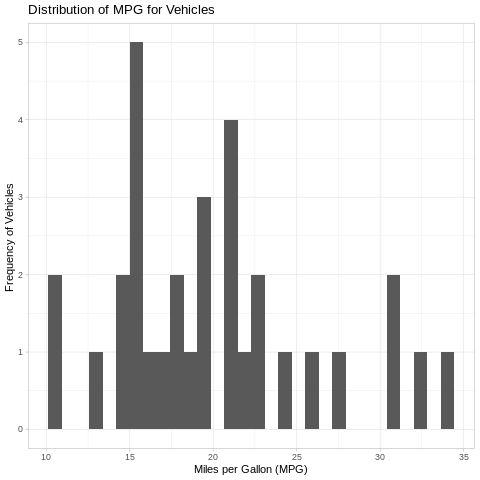

In [6]:
%%R
#base R
data("mtcars")
#head(mtcars, 1)
hist(mtcars$mpg, xlab = "Miles per Gallon (MPG)", ylab = "Frequency of Vehicles", main = "Distribution of MPG for Vehicles")

#ggplot
ggplot(data = mtcars, aes(x = mpg)) +
  geom_histogram() + labs(x ="Miles per Gallon (MPG)", y="Frequency of Vehicles ", title = "Distribution of MPG for Vehicles") + theme_light()
#binwidth=5,boundary=10

Construct a scatterplot of miles per gallon (mpg) versus weight (wt) using R’s base graphics then again with ggplot.

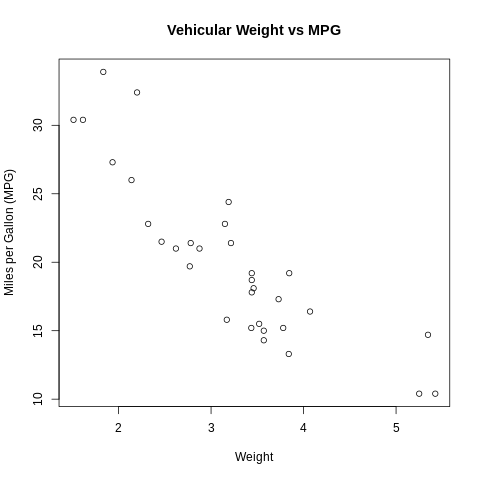

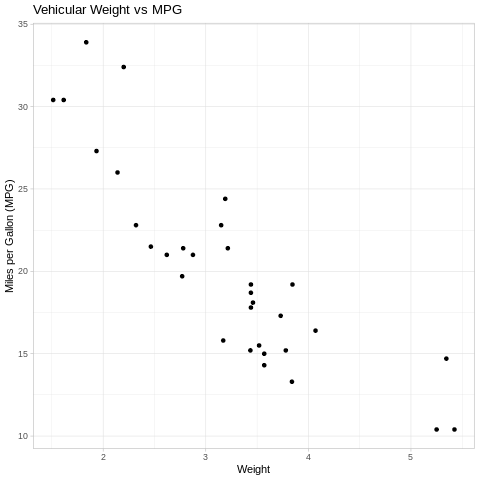

In [7]:
%%R
#base R
plot(x=mtcars$wt, y=mtcars$mpg, xlab="Weight", ylab="Miles per Gallon (MPG)",
     main="Vehicular Weight vs MPG")

#ggplot
ggplot(mtcars, aes(x=wt, y=mpg)) + geom_point() + labs(x ="Weight", y="Miles per Gallon (MPG)", title = "Vehicular Weight vs MPG") + theme_light()

Write code to make a violin plot of MPG by transmission using the mtcars dataset.

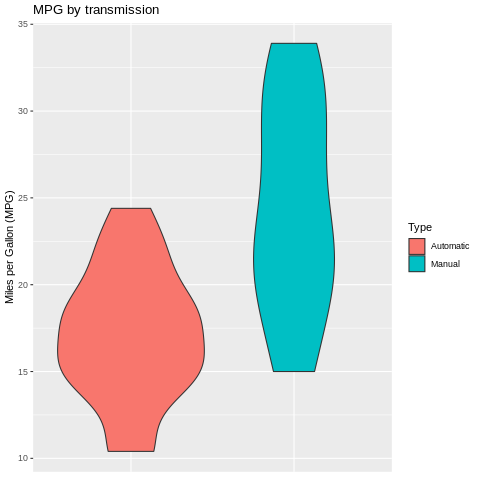

In [8]:
%%R
#plot mtcars data set
mtcars_type <- mtcars %>% select(mpg, am)
mtcars_type$am <- as.factor(mtcars_type$am)
mtcars_type$am <- ifelse(mtcars_type$am==1,"Manual","Automatic")
names(mtcars_type)[names(mtcars_type) == "am"] = "Type"

mpgtrans <- ggplot(mtcars_type, aes(x=Type, y=mpg, fill=Type)) +
  geom_violin() + labs(y="Miles per Gallon (MPG)", title = "MPG by transmission") +  theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())
mpgtrans

Write code to make a scatterplot of price by carat for quality cut using facetwrap using diamonds dataset from dplyr package.


`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


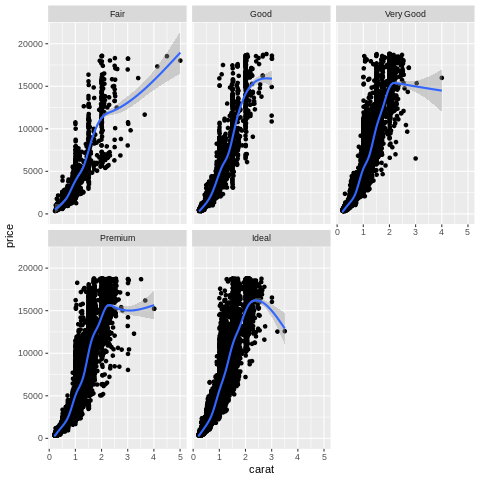

In [9]:
%%R
#plot diamonds data set
data("diamonds")
#head(diamonds, 1)
pcc <- ggplot(data = diamonds, aes(x = carat, y = price)) +
  geom_point() + geom_smooth() + facet_wrap( ~ cut)
pcc

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


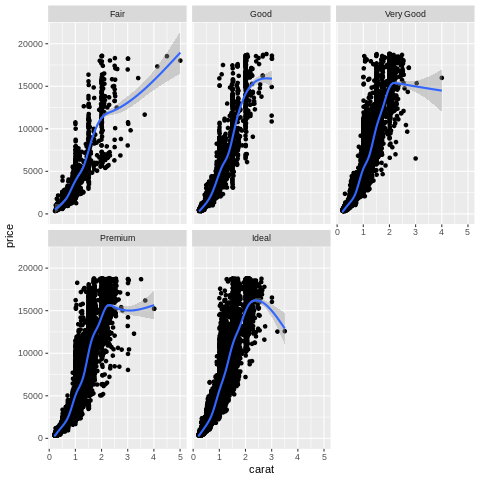

In [10]:
%%R
#quick plot- qplot() is a nice alternative sometimes and is part of ggplot2 package
for_funsies <- qplot(x=carat, y=price, facets= ~cut, data=diamonds) + geom_smooth()
for_funsies